In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [13]:
#Load Dataset for training
data = pd.read_csv('products.csv')

In [14]:
data.shape

(280279, 27)

In [61]:
data

,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
0,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,112,10/11/2015 16:40,10/11/2015 16:51,5,17,1,1,NaN,300059,666.0
1,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,113,10/11/2015 16:51,10/11/2015 16:52,5,17,5,1,NaN,300059,20.0
2,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,114,10/11/2015 16:53,10/11/2015 16:53,5,17,2,1,NaN,300059,6.0
3,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,115,10/11/2015 16:53,10/11/2015 16:53,5,17,4,1,NaN,300059,2.0
4,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,21816,0000-00-00 00:00:00,02/02/2016 11:21,4,17,10,1,NaN,NaN,NaN
5,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,116,11/11/2015 08:48,11/11/2015 08:51,5,18,1,1,NaN,300104,205.0
6,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,117,11/11/2015 08:51,11/11/2015 08:55,5,18,5,1,NaN,300104,206.0
7,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,118,11/11/2015 08:55,11/11/2015 08:59,5,18,2,1,NaN,300104,220.0
8,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,119,11/11/2015 08:59,11/11/2015 08:59,5,18,4,1,NaN,300104,7.0
9,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,37959,31/03/2016 09:17,31/03/2016 09:22,0,18,10,1,NaN,NaN,342.0


In [15]:
list(data)

['idproduct',
 'br_number_idbr_number',
 'manufacturer_idmanufacturer',
 'product_type_idproduct_type',
 'box_idbox',
 'model_idmodel',
 'serialnumber',
 'decomm_id',
 'customer_ref',
 'asset_tag',
 'processType',
 'estimated_price',
 'sold_to',
 'warranty',
 'finished_processing',
 'value',
 'pallet_id',
 'idprocess',
 'start_time',
 'end_time',
 'station_idstation',
 'product_idproduct',
 'process_types_idprocess_types',
 'pass_fail',
 'estimated_process_cost',
 'box_id',
 'duration']

In [44]:
data

,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
0,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,112,10/11/2015 16:40,10/11/2015 16:51,5,17,1,1,NaN,300059,666.0
1,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,113,10/11/2015 16:51,10/11/2015 16:52,5,17,5,1,NaN,300059,20.0
2,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,114,10/11/2015 16:53,10/11/2015 16:53,5,17,2,1,NaN,300059,6.0
3,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,115,10/11/2015 16:53,10/11/2015 16:53,5,17,4,1,NaN,300059,2.0
4,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,21816,0000-00-00 00:00:00,02/02/2016 11:21,4,17,10,1,NaN,NaN,NaN
5,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,116,11/11/2015 08:48,11/11/2015 08:51,5,18,1,1,NaN,300104,205.0
6,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,117,11/11/2015 08:51,11/11/2015 08:55,5,18,5,1,NaN,300104,206.0
7,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,118,11/11/2015 08:55,11/11/2015 08:59,5,18,2,1,NaN,300104,220.0
8,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,119,11/11/2015 08:59,11/11/2015 08:59,5,18,4,1,NaN,300104,7.0
9,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,37959,31/03/2016 09:17,31/03/2016 09:22,0,18,10,1,NaN,NaN,342.0


In [72]:
br_number_idbr_number=data['br_number_idbr_number'].value_counts()
br_number_idbr_number


BR-020453    6108
BR-020158    3831
BR-016612    3542
BR-016496    2928
BR-019369    2796
BR-020916    2481
BR-019499    2416
BR-017098    2102
BR-018236    2094
BR-020287    1966
BR-020168    1960
BR-018876    1936
BR-019861    1933
BR-020658    1881
BR-016841    1766
BR-019705    1758
BR-017530    1723
BR-016254    1689
BR-020328    1674
BR-019976    1572
BR-016844    1548
BR-019722    1548
BR-020449    1545
BR-020677    1494
BR-020308    1493
BR-018795    1440
BR-016255    1387
BR-020509    1364
BR-018652    1348
BR-018553    1341
             ... 
BR-016477       5
BR-017997       5
BR-019893       4
BR-019744       4
BR-020103       4
BR-017609       4
BR-018222       4
BR-019788       4
BR-016995       3
BR-018774       3
BR-006248       3
BR-018705       3
BR-019425       3
BR-017656       3
BR-020159       3
BR-016122       3
BR-018671       3
BR-018904       3
BR-020541       3
BR-017704       3
BR-018975       3
BR-018857       3
BR-020768       3
BR-015086       3
BR-017351 

In [70]:
box_idbox=data['box_idbox'].value_counts()
box_idbox

0         279388
300747         5
500818         4
300416         4
500838         4
500888         4
300030         4
500841         4
300867         4
301000         4
300931         4
300601         4
500899         4
300743         4
300753         4
300738         4
500755         4
500808         4
500872         4
300948         4
300317         4
500863         4
300745         3
300491         3
300520         3
300488         3
300779         3
300267         3
301024         3
300748         3
           ...  
300580         3
300325         3
301098         3
301091         3
300328         3
300329         3
300585         3
300078         3
300846         3
301102         3
300322         3
300604         3
301108         3
301117         3
300848         3
300342         3
301110         3
300087         3
300084         3
300596         3
301079         3
300602         3
301114         3
300091         3
300088         3
300344         3
300095         3
300863        

In [71]:
box0 = data.groupby('box_idbox').get_group(0)
box0

,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
0,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,112,10/11/2015 16:40,10/11/2015 16:51,5,17,1,1,NaN,300059,666.0
1,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,113,10/11/2015 16:51,10/11/2015 16:52,5,17,5,1,NaN,300059,20.0
2,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,114,10/11/2015 16:53,10/11/2015 16:53,5,17,2,1,NaN,300059,6.0
3,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,115,10/11/2015 16:53,10/11/2015 16:53,5,17,4,1,NaN,300059,2.0
4,17,BR-015124,26,1,0,16.0,3.56266E+14,NaN,NaN,NaN,...,21816,0000-00-00 00:00:00,02/02/2016 11:21,4,17,10,1,NaN,NaN,NaN
5,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,116,11/11/2015 08:48,11/11/2015 08:51,5,18,1,1,NaN,300104,205.0
6,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,117,11/11/2015 08:51,11/11/2015 08:55,5,18,5,1,NaN,300104,206.0
7,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,118,11/11/2015 08:55,11/11/2015 08:59,5,18,2,1,NaN,300104,220.0
8,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,119,11/11/2015 08:59,11/11/2015 08:59,5,18,4,1,NaN,300104,7.0
9,18,BR-015124,14,1,0,10.0,3.52612E+14,NaN,NaN,NaN,...,37959,31/03/2016 09:17,31/03/2016 09:22,0,18,10,1,NaN,NaN,342.0


In [62]:
grouped = data.groupby('box_idbox').get_group(500841)
grouped

,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
280252,71181,BR-021340,23,3,500841,1786.0,CZC0061JG5,NaN,NaN,NaN,...,297435,22/01/2018 11:09,22/01/2018 11:10,1,71181,1,1,NaN,500841,79.0
280253,71181,BR-021340,23,3,500841,1786.0,CZC0061JG5,NaN,NaN,NaN,...,297436,22/01/2018 11:10,22/01/2018 11:10,1,71181,2,1,NaN,500841,4.0
280254,71181,BR-021340,23,3,500841,1786.0,CZC0061JG5,NaN,NaN,NaN,...,297437,22/01/2018 11:10,22/01/2018 11:10,1,71181,3,1,NaN,500841,1.0
280255,71181,BR-021340,23,3,500841,1786.0,CZC0061JG5,NaN,NaN,NaN,...,297438,22/01/2018 11:10,22/01/2018 11:11,1,71181,5,1,NaN,500841,13.0


In [69]:
include = (data["box_idbox"] != 0) 
include = data[include]
include


,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
205490,49801,BR-020285,7,1,300896,19.0,1.3551E+13,NaN,NaN,NaN,...,217074,25/08/2017 12:11,25/08/2017 12:12,5,49801,1,1,NaN,300896,82.0
205491,49801,BR-020285,7,1,300896,19.0,1.3551E+13,NaN,NaN,NaN,...,217075,25/08/2017 12:12,25/08/2017 12:13,5,49801,5,0,NaN,300896,53.0
205492,49801,BR-020285,7,1,300896,19.0,1.3551E+13,NaN,NaN,NaN,...,217076,25/08/2017 12:13,25/08/2017 12:13,5,49801,2,1,NaN,300896,1.0
214540,52141,BR-020329,7,1,300990,19.0,1.3627E+13,NaN,NaN,NaN,...,225981,13/09/2017 12:23,13/09/2017 12:25,5,52141,1,1,NaN,300990,81.0
214541,52141,BR-020329,7,1,300990,19.0,1.3627E+13,NaN,NaN,NaN,...,225982,13/09/2017 12:25,13/09/2017 12:27,5,52141,5,0,NaN,300990,119.0
214542,52141,BR-020329,7,1,300990,19.0,1.3627E+13,NaN,NaN,NaN,...,225983,13/09/2017 12:27,13/09/2017 12:27,5,52141,2,1,NaN,300990,3.0
214632,52166,BR-020329,7,1,300124,19.0,1.3415E+13,NaN,NaN,NaN,...,226041,13/09/2017 13:45,13/09/2017 13:46,5,52166,1,1,NaN,300124,37.0
214633,52166,BR-020329,7,1,300124,19.0,1.3415E+13,NaN,NaN,NaN,...,226042,13/09/2017 13:46,13/09/2017 13:47,5,52166,5,0,NaN,300124,29.0
214634,52166,BR-020329,7,1,300124,19.0,1.3415E+13,NaN,NaN,NaN,...,226043,13/09/2017 13:47,13/09/2017 13:47,5,52166,2,1,NaN,300124,3.0
214651,52171,BR-020329,7,1,300646,19.0,1.3624E+13,NaN,NaN,NaN,...,226054,13/09/2017 13:57,13/09/2017 13:58,5,52171,1,1,NaN,300646,60.0


In [67]:
box_idbox=include['box_idbox'].value_counts()
box_idbox

300747    5
300030    4
500818    4
300601    4
500808    4
300948    4
300416    4
500838    4
500841    4
500863    4
500872    4
500888    4
300867    4
300738    4
300743    4
300317    4
300753    4
301000    4
300931    4
500755    4
500899    4
300325    3
300373    3
300370    3
300359    3
300358    3
300357    3
300502    3
300352    3
300344    3
         ..
300749    3
300759    3
300763    3
300778    3
300657    3
300779    3
300790    3
300791    3
300804    3
300805    3
300806    3
300741    3
300731    3
300729    3
300667    3
300714    3
300709    3
300705    3
300702    3
300698    3
300694    3
300728    3
300689    3
300687    3
300684    3
300680    3
300673    3
300669    3
500758    1
500970    1
Name: box_idbox, dtype: int64

In [26]:
finished_processing=data['finished_processing'].value_counts()
finished_processing

1    279388
0       891
Name: finished_processing, dtype: int64

In [28]:
pass_fail=data['pass_fail'].value_counts()
pass_fail

 1    251827
 0     27187
-3      1265
Name: pass_fail, dtype: int64

In [29]:
value=data['value'].value_counts()
value

75.0         2477
0.01         2137
0.0          1789
45.0         1630
25.0         1347
0            1100
10.0         1000
15.0          999
6             600
40.0          492
8             423
1.0           324
55.0          285
62.5          251
13            238
20.0          224
13.0          207
90.0          203
200.0         162
25            138
175.0         126
15            120
65.0          103
35.0           93
52.5           90
55             90
6.0            90
65             89
218.0          78
90             52
5              51
50.0           47
48.0           46
10             42
40             37
50             36
60.0           36
250.0          28
210.0          24
220.0          18
60             12
185.0          12
5.0            11
52.5            9
100.0           9
8.0             8
48              7
70.0            7
70              6
14.0            6
130             6
140             6
30.0            6
35              6
110.0           6
120.0     

In [30]:
sold=data['sold_to'].value_counts()
sold

T&C (returned)                  41254
Simply Gadgets                  37024
S2S - Scrap Destruction         22845
Able247 Logistics               18679
ALM Micros                      12047
Able IT Ltd                      8284
SImply Gadgets                   7708
S2S Destruction                  5531
Hikkado                          4150
BB Sale April                    3622
Todo                             3361
HalaGSM                          3345
Scrap                            2840
CLH Trading                      2826
datatek                          2469
ebay                             1613
simply gadgets                   1602
Greg Wienieski                   1363
Bulk Sell                        1082
Virgin Media                     1000
iNet Group Ltd                    933
Stan. Co                          879
simply gadgets (LAST MONTH)       876
Hikkadu                           767
Dentons - Return                  670
B2B                               645
company     

In [61]:
estimated_price=data['estimated_price'].value_counts()
estimated_price

0.01    2137
Name: estimated_price, dtype: int64

## Data visualisations
In this section we observe each feature vs the target. We want to know how many istances convert from each feature as well as in what ratio. So per feature we use to plots.

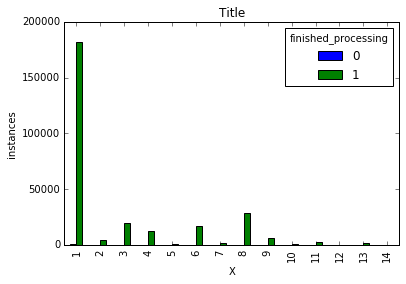

In [38]:
%matplotlib inline
pd.crosstab(data.product_type_idproduct_type,data.finished_processing).plot(kind='bar')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('instances')


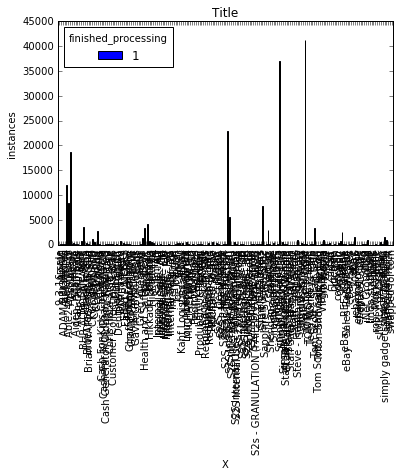

In [39]:
pd.crosstab(data.sold_to,data.finished_processing).plot(kind='bar')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('instances')




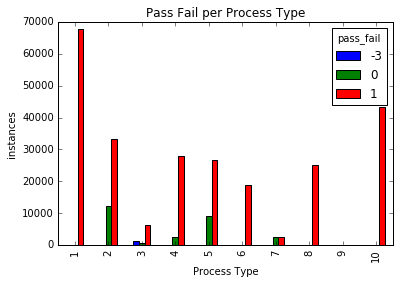

In [63]:
pd.crosstab(data.process_types_idprocess_types,data.pass_fail).plot(kind='bar')
plt.title('Pass Fail per Process Type')
plt.xlabel('Process Type')
plt.ylabel('instances')

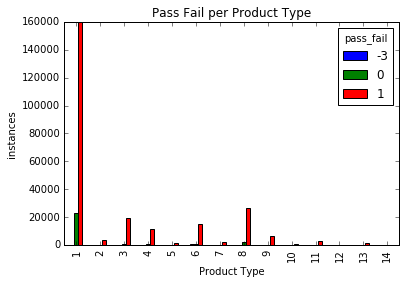

In [64]:
pd.crosstab(data.product_type_idproduct_type,data.pass_fail).plot(kind='bar')
plt.title('Pass Fail per Product Type')
plt.xlabel('Product Type')
plt.ylabel('instances')

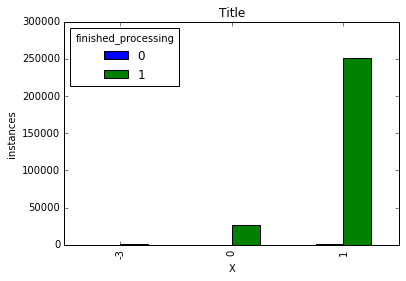

In [42]:
pd.crosstab(data.pass_fail,data.finished_processing).plot(kind='bar')
plt.title('Title')
plt.xlabel('X')
plt.ylabel('instances')

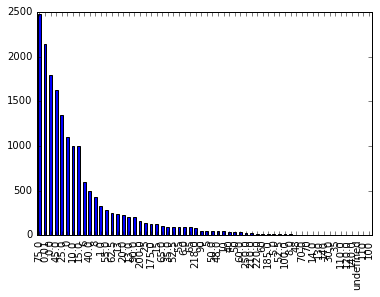

In [58]:

value.plot.bar()


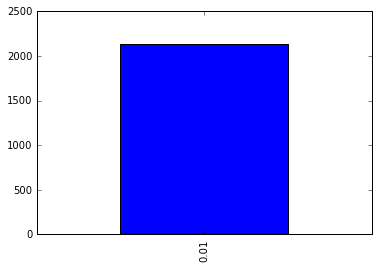

In [62]:
estimated_price.plot.bar()

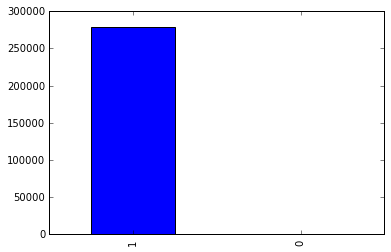

In [65]:
finished_processing.plot.bar()


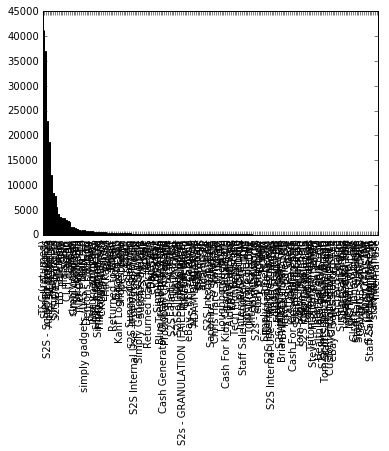

In [66]:
sold.plot.bar()


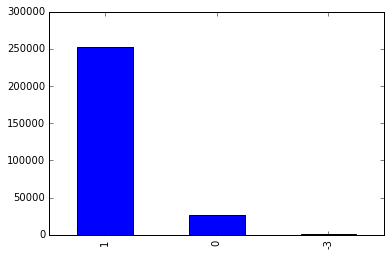

In [67]:
pass_fail.plot.bar()

In [128]:
data['start_time'] = pd.to_datetime(data['start_time'])


data['end_time'] = pd.to_datetime(data['end_time'])


In [129]:
data.corr()

,idproduct,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,processType,estimated_price,warranty,finished_processing,idprocess,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,duration
idproduct,1.000000e+00,2.516713e-01,0.310153,0.096423,4.695329e-01,0.642474,2.845928e-14,-2.357881e-01,-0.097028,9.905175e-01,3.933889e-01,1.000000e+00,-3.950903e-02,0.029809,NaN,-1.208932e-02
manufacturer_idmanufacturer,2.516713e-01,1.000000e+00,0.505406,-0.015193,5.127517e-01,0.173325,-1.702388e-16,-5.028945e-03,0.015325,2.416415e-01,5.667035e-01,2.516713e-01,-5.101444e-03,0.065715,NaN,-1.513083e-02
product_type_idproduct_type,3.101533e-01,5.054059e-01,1.000000,-0.031935,5.881027e-01,0.273541,NaN,3.790721e-01,0.033262,3.028301e-01,4.579105e-01,3.101533e-01,-1.824477e-03,0.036475,NaN,-6.795423e-03
box_idbox,9.642350e-02,-1.519342e-02,-0.031935,1.000000,-1.439308e-02,0.040904,NaN,NaN,-0.991515,9.021404e-02,-1.985559e-02,9.642350e-02,-3.230412e-02,-0.023144,NaN,5.794178e-03
model_idmodel,4.695329e-01,5.127517e-01,0.588103,-0.014393,1.000000e+00,0.305268,-9.839423e-16,8.114899e-02,0.015115,4.550583e-01,4.851923e-01,4.695329e-01,-1.530637e-02,0.049862,NaN,-1.174582e-02
processType,6.424742e-01,1.733248e-01,0.273541,0.040904,3.052679e-01,1.000000,NaN,2.232101e-02,-0.041254,6.299295e-01,2.869386e-01,6.424742e-01,-1.814706e-02,0.026402,NaN,-9.658289e-03
estimated_price,2.845928e-14,-1.702388e-16,NaN,NaN,-9.839423e-16,NaN,1.000000e+00,5.997403e-16,NaN,2.299251e-15,3.616839e-16,2.845928e-14,8.974234e-17,NaN,NaN,-2.033190e-16
warranty,-2.357881e-01,-5.028945e-03,0.379072,NaN,8.114899e-02,0.022321,5.997403e-16,1.000000e+00,NaN,-2.294382e-01,-7.489358e-02,-2.357881e-01,-3.607151e-03,-0.000329,NaN,9.770184e-04
finished_processing,-9.702801e-02,1.532521e-02,0.033262,-0.991515,1.511456e-02,-0.041254,NaN,NaN,1.000000,-9.081193e-02,2.015952e-02,-9.702801e-02,3.256540e-02,0.024472,NaN,-6.052439e-03
idprocess,9.905175e-01,2.416415e-01,0.302830,0.090214,4.550583e-01,0.629930,2.299251e-15,-2.294382e-01,-0.090812,1.000000e+00,3.762596e-01,9.905175e-01,3.291613e-03,0.031383,NaN,-1.241692e-02


In [161]:
filtered = (data["start_time"] > '01/01/2018') & (data["start_time"] <= '31/01/2018')
filtered_data = data[filtered]
filtered_data

,idproduct,br_number_idbr_number,manufacturer_idmanufacturer,product_type_idproduct_type,box_idbox,model_idmodel,serialnumber,decomm_id,customer_ref,asset_tag,...,idprocess,start_time,end_time,station_idstation,product_idproduct,process_types_idprocess_types,pass_fail,estimated_process_cost,box_id,duration
241736,59534,BR-020620,7,1,0,278.0,3.59254E+14,NaN,NaN,NaN,...,293810,2018-01-15 11:23:00,2018-01-15 11:23:00,6,59534,4,1,NaN,300268,2.0
241737,59534,BR-020620,7,1,0,278.0,3.59254E+14,NaN,NaN,NaN,...,293811,2018-01-15 11:23:00,2018-01-15 11:23:00,6,59534,7,1,NaN,300268,3.0
241738,59534,BR-020620,7,1,0,278.0,3.59254E+14,NaN,NaN,NaN,...,293814,2018-01-15 11:23:00,2018-01-15 11:23:00,6,59534,5,1,NaN,300268,10.0
241739,59534,BR-020620,7,1,0,278.0,3.59254E+14,NaN,NaN,NaN,...,293815,2018-01-15 11:23:00,2018-01-15 11:23:00,6,59534,2,1,NaN,300268,2.0
241740,59534,BR-020620,7,1,0,278.0,3.59254E+14,NaN,NaN,NaN,...,293817,2018-01-15 11:23:00,2018-01-15 11:23:00,6,59534,6,1,NaN,300268,6.0
242905,59808,BR-020620,7,1,0,278.0,3.58367E+14,NaN,NaN,NaN,...,293820,2018-01-15 11:24:00,2018-01-15 11:24:00,6,59808,4,1,NaN,300545,1.0
242906,59808,BR-020620,7,1,0,278.0,3.58367E+14,NaN,NaN,NaN,...,293821,2018-01-15 11:24:00,2018-01-15 11:24:00,6,59808,7,1,NaN,300545,3.0
242907,59808,BR-020620,7,1,0,278.0,3.58367E+14,NaN,NaN,NaN,...,293823,2018-01-15 11:24:00,2018-01-15 11:24:00,6,59808,5,1,NaN,300545,9.0
242908,59808,BR-020620,7,1,0,278.0,3.58367E+14,NaN,NaN,NaN,...,293828,2018-01-15 11:25:00,2018-01-15 11:25:00,6,59808,2,1,NaN,300545,35.0
242909,59808,BR-020620,7,1,0,278.0,3.58367E+14,NaN,NaN,NaN,...,293829,2018-01-15 11:25:00,2018-01-15 11:25:00,6,59808,6,1,NaN,300545,6.0


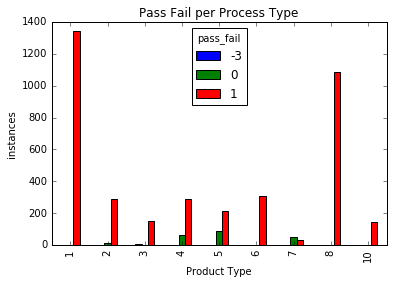

In [162]:
pd.crosstab(filtered_data.process_types_idprocess_types,filtered_data.pass_fail).plot(kind='bar')
plt.title('Pass Fail per Process Type')
plt.xlabel('Product Type')
plt.ylabel('instances')

## Dummy variables
It is important to create dummy variables.

## Feature Selection
As figured out from the plots the selected features will be the following list.

## Selected features


## Classifier
We select a logistic classifier. Because the class 1 is minority we use a class weight.

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

## Test Dataset
Now the trained classifier will work upon the test dataset.

Index([u'id', u'date', u'origin_airport', u'destination_airport',
       u'departure_date', u'return_date', u'target', u'flight_type_0',
       u'flight_type_1', u'seat_class_code_0', u'seat_class_code_1',
       u'seat_class_code_2', u'adults_1', u'adults_2', u'adults_3',
       u'adults_4', u'adults_5', u'adults_6', u'adults_7', u'adults_8',
       u'children_0', u'children_1', u'children_2', u'children_3',
       u'children_4', u'children_5', u'children_6', u'affiliate_id_0',
       u'affiliate_id_1', u'affiliate_id_2', u'journey_type_0',
       u'journey_type_1', u'journey_type_2', u'currency_0', u'currency_1',
       u'currency_2', u'currency_3', u'currency_4', u'currency_5',
       u'currency_6', u'currency_7', u'currency_8', u'currency_9',
       u'currency_10', u'currency_11', u'currency_12', u'currency_13',
       u'currency_14', u'currency_15', u'currency_16', u'currency_17',
       u'currency_18', u'currency_19', u'currency_20', u'currency_21',
       u'currency_22', u'curre

array([0, 0, 0, ..., 0, 0, 0])

[[ 0.8  0.2]
 [ 0.8  0.2]
 [ 1.   0. ]
 ..., 
 [ 0.8  0.2]
 [ 1.   0. ]
 [ 1.   0. ]]


## Add a new column with outcomes

,id,date,origin_airport,destination_airport,flight_type,seat_class_code,adults,children,affiliate_id,journey_type,currency,departure_date,return_date,target
0,69549,2017-09-01,136,520,0,2,2,0,1,0,9,2017-11-07,NaN,0
1,69550,2017-09-01,136,520,0,2,2,0,1,0,9,2017-11-07,NaN,0
2,69551,2017-09-01,619,645,0,2,1,0,2,0,23,2017-09-15,NaN,0
3,69552,2017-09-01,531,1208,1,2,2,1,2,1,23,2017-09-12,2017-09-28,0
4,69553,2017-09-01,552,969,1,2,2,0,1,1,9,2018-08-01,2018-08-08,0
5,69554,2017-09-01,434,1123,1,2,1,0,0,1,9,2017-09-01,2017-09-04,0
6,69555,2017-09-01,539,321,1,2,2,2,1,2,9,2018-07-31,2018-08-22,0
7,69556,2017-09-01,576,1380,1,2,2,0,1,2,9,2018-04-30,2018-05-15,0
8,69557,2017-09-01,619,1185,0,2,1,0,2,1,23,2017-09-23,NaN,0
9,69558,2017-09-01,619,84,0,2,1,0,2,1,23,2017-09-30,NaN,0


0    79168
Name: target, dtype: int64

## Bonus Exercise

1.0